In [293]:
import numpy as np
import pandas as pd
import time

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.classifier import ClassificationReport
import seaborn as sns

from tqdm import tqdm
import nltk
import spacy
import re
from matplotlib import pyplot as plt

#nlp = spacy.load('en_core_web_lg')

In [64]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [104]:
def clean_from_articles(newsgroups):
    clean = []
    for i, a in enumerate(newsgroups['data']):
        cln1 = re.sub('^#>.*\n', '', a, flags=re.MULTILINE)
        clean.append(re.sub('\n*.*From article.*\n', '', cln1))
    
    return clean

def clean_text(text):
    nlp_text = nlp(text)
    lemmas = [w.lower_ if w.lemma == '-PRON-' else w.lemma_ 
              for w in nlp_text if w.is_alpha and not w.is_stop]
    return ' '.join(lemmas)

In [72]:
clean_train = clean_from_articles(newsgroups_train)

In [73]:
clean_test = clean_from_articles(newsgroups_test)

In [205]:
vectorizer = TfidfVectorizer()
train_labels = newsgroups_train['target']
train_feats = vectorizer.fit_transform(clean_train)
test_labels = newsgroups_test['target']
test_feats = vectorizer.transform(clean_test)

In [200]:
test_feats.todense().shape

(7532, 101631)

In [206]:
model = MultinomialNB(alpha=.01)
model.fit(train_feats, train_labels)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [207]:
model.score(train_feats,train_labels)

0.9588120912144246

In [208]:
pred = model.predict(test_feats)
print(model.score(test_feats,test_labels))

0.7000796601168349


In [188]:
accuracy_score(pred, test_labels)

0.7000796601168349

In [130]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=2, gamma='auto')

In [131]:
SVM.fit(train_feats, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
start = time.time()
svm_predict = SVM.predict(test_feats)
end = time.time()
print('took', int(end-start), 'seconds')

took 76 seconds


In [133]:
print("SVM Accuracy Score -> ",accuracy_score(svm_predict, test_labels)*100)


SVM Accuracy Score ->  66.25066383430695


In [232]:
t1 = []
t2 = []
for idx, cat in enumerate(newsgroups_train.target_names):
    t1.append(idx)
    t2.append(cat)
d = {'targets':t1, 'target_names':t2}
target_names_map = pd.DataFrame(d)

In [294]:
class_report = classification_report(test_labels, pred, target_names=target_names_map['target_names'], output_dict=True)

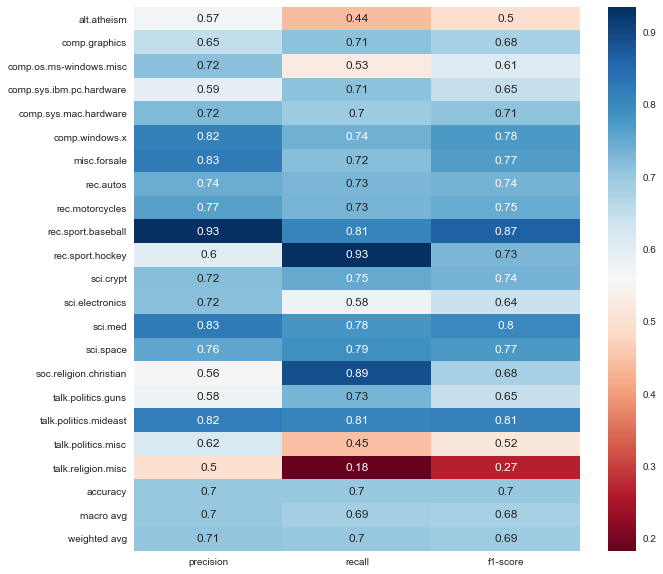

In [298]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True, ax=ax, cmap = 'RdBu')

In [274]:
lines

['                          precision    recall  f1-score   support',
 '',
 '             alt.atheism       0.57      0.44      0.50       319',
 '           comp.graphics       0.65      0.71      0.68       389',
 ' comp.os.ms-windows.misc       0.72      0.53      0.61       394',
 'comp.sys.ibm.pc.hardware       0.59      0.71      0.65       392',
 '   comp.sys.mac.hardware       0.72      0.70      0.71       385',
 '          comp.windows.x       0.82      0.74      0.78       395',
 '            misc.forsale       0.83      0.72      0.77       390',
 '               rec.autos       0.74      0.73      0.74       396',
 '         rec.motorcycles       0.77      0.73      0.75       398',
 '      rec.sport.baseball       0.93      0.81      0.87       397',
 '        rec.sport.hockey       0.60      0.93      0.73       399',
 '               sci.crypt       0.72      0.75      0.74       396',
 '         sci.electronics       0.72      0.58      0.64       393',
 '             

In [280]:
lines = class_report.split('\n')
target_names = []
frequency = []
plotdata = []
for line in lines[2 : (len(lines) - 5)]:
        t = line.split()
        frequency.append(t[4])
        target_names.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotdata.append(v)

In [283]:
title = 'Classification Report'
xlabel = 'scoring'
ylabel = 'Classes'
xticklabels = target_names
yticklabels = plotdata
figure_width = 15
figure_height = len(target_names)
correct_orientation = False

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


ImportError: cannot import name 'izip' from 'itertools' (unknown location)

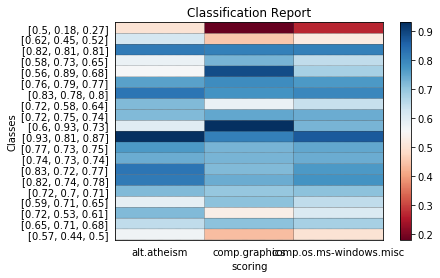

In [287]:
heatmap(np.array(plotdata),title,xlabel,ylabel,xticklabels,yticklabels)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


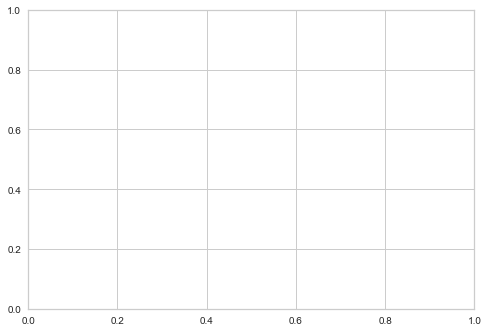

In [292]:
visualizer = ClassificationReport(model)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()


def main():

    sampleClassificationReport = """             precision    recall  f1-score   support

          Acacia       0.62      1.00      0.76        66
          Blossom       0.93      0.93      0.93        40
          Camellia       0.59      0.97      0.73        67
          Daisy       0.47      0.92      0.62       272
          Echium       1.00      0.16      0.28       413

        avg / total       0.77      0.57      0.49       858"""

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()


if __name__ == '__main__':
    main()